Confusion Matrix:
[[ 3  5  2  0  1  0]
 [ 2 73  4  0  2  0]
 [ 0  2 66  0  0  0]
 [ 1  6  0  7  1  0]
 [ 0  3  0  0 20  0]
 [ 0  2  1  0  0  3]]

Classification Report:
                precision    recall  f1-score   support

           DoS       0.50      0.27      0.35        11
      Exploits       0.80      0.90      0.85        81
       Fuzzers       0.90      0.97      0.94        68
       Generic       1.00      0.47      0.64        15
Reconnaissance       0.83      0.87      0.85        23
     Shellcode       1.00      0.50      0.67         6

      accuracy                           0.84       204
     macro avg       0.84      0.66      0.72       204
  weighted avg       0.84      0.84      0.83       204



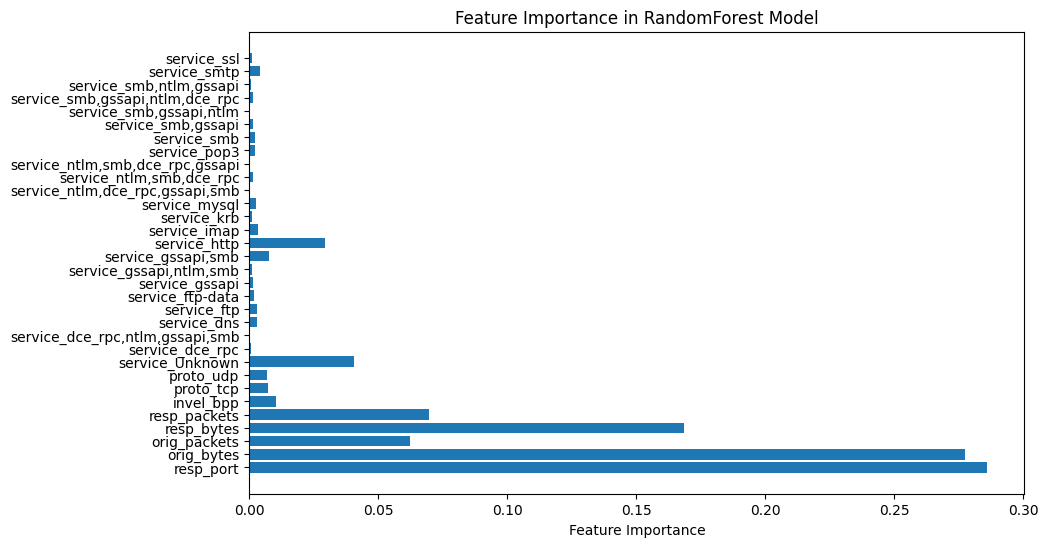

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/threats.csv'
df = pd.read_csv(file_path)

# Preprocessing
# Handle missing values
df = df.fillna('Unknown')

# Convert categorical variables to numerical
categorical_features = ['proto', 'service']
numerical_features = ['resp_port', 'orig_bytes', 'orig_packets', 'resp_bytes', 'resp_packets', 'invel_bpp']

# Separate features and target
X = df[categorical_features + numerical_features]
y = df['label']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

classifier = pipeline.named_steps['classifier']
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_categorical_features = encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, encoded_categorical_features])

feature_importances = classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(all_features, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest Model')
plt.show()


In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = '/content/threats.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to inspect the data
print("Original Data:")
print(data.head())

# Check for duplicate entries
print("\nNumber of duplicate entries before removal:", data.duplicated().sum())

# Remove duplicate entries
data_cleaned = data.drop_duplicates()

# Check the number of duplicate entries after removal
print("Number of duplicate entries after removal:", data_cleaned.duplicated().sum())

# Save the cleaned data to a new CSV file
cleaned_file_path = '/content/threats_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print("\nCleaned data saved to:", cleaned_file_path)


Original Data:
        orig_ip         resp_ip  resp_port proto service     label  \
0  175.45.176.3  149.171.126.15         80   tcp    http  Exploits   
1  175.45.176.2  149.171.126.15        520   udp     NaN   Fuzzers   
2  175.45.176.0  149.171.126.18         80   tcp    http       DoS   
3  175.45.176.3  149.171.126.12         25   tcp    smtp       DoS   
4  175.45.176.1  149.171.126.15        179   tcp     NaN   Fuzzers   

   orig_bytes  orig_packets  resp_bytes  resp_packets     invel_bpp  
0       68100            58         656            16  4.100000e+01  
1          60             2           0             0  9.220000e+18  
2         774            10         908             8  1.135000e+02  
3       69568            70        1996            28  7.128571e+01  
4        1018            10         336             8  4.200000e+01  

Number of duplicate entries before removal: 98
Number of duplicate entries after removal: 0

Cleaned data saved to: /content/threats_cleaned.cs

,orig_ip,resp_ip,resp_port,proto,service,label,orig_bytes,orig_packets,resp_bytes,resp_packets,invel_bpp
0,175.45.176.3,149.171.126.15,80,tcp,http,Exploits,68100,58,656,16,4.100000e+01
2,175.45.176.0,149.171.126.18,80,tcp,http,DoS,774,10,908,8,1.135000e+02
3,175.45.176.3,149.171.126.12,25,tcp,smtp,DoS,69568,70,1996,28,7.128571e+01
7,175.45.176.1,149.171.126.13,8080,tcp,http,DoS,1766,10,256,6,4.266667e+01
9,175.45.176.0,149.171.126.16,80,tcp,http,Exploits,1406,12,3640,10,3.640000e+02
...,...,...,...,...,...,...,...,...,...,...,...
888,175.45.176.0,149.171.126.14,110,tcp,pop3,Exploits,1096,24,41018,48,8.545417e+02
890,175.45.176.2,149.171.126.14,80,tcp,http,Exploits,896,12,28200,26,1.084615e+03
891,175.45.176.2,149.171.126.12,69,udp,NaN,Exploits,1104,2,0,0,9.220000e+18
908,175.45.176.1,149.171.126.14,88,udp,krb,DoS,612,2,0,0,9.220000e+18


,orig_ip,resp_ip,resp_port,proto,service,label,orig_bytes,orig_packets,resp_bytes,resp_packets,invel_bpp
1,175.45.176.2,149.171.126.15,520,udp,NaN,Fuzzers,60,2,0,0,9.220000e+18
4,175.45.176.1,149.171.126.15,179,tcp,NaN,Fuzzers,1018,10,336,8,4.200000e+01
5,175.45.176.1,149.171.126.14,179,tcp,NaN,Fuzzers,762,14,544,10,5.440000e+01
8,175.45.176.2,149.171.126.10,445,tcp,"smb,gssapi",Fuzzers,988,12,680,8,8.500000e+01
10,175.45.176.0,149.171.126.11,514,udp,NaN,Fuzzers,1872,2,0,0,9.220000e+18
...,...,...,...,...,...,...,...,...,...,...,...
912,175.45.176.0,149.171.126.14,514,udp,NaN,Fuzzers,2054,2,0,0,9.220000e+18
913,175.45.176.3,149.171.126.14,514,udp,NaN,Fuzzers,1780,2,0,0,9.220000e+18
915,175.45.176.3,149.171.126.11,520,udp,NaN,Fuzzers,64,2,0,0,9.220000e+18
916,175.45.176.2,149.171.126.19,514,udp,NaN,Fuzzers,172,2,0,0,9.220000e+18


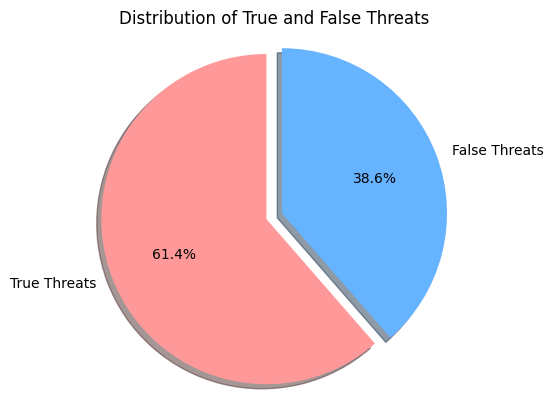

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the CSV file
file_path = '/content/threats_cleaned.csv'
data = pd.read_csv(file_path)

# Define true and false threats based on the 'label' column
true_threats = ['Exploits', 'DoS']
false_threats = ['Fuzzers']  # Add other labels if necessary

# Filter the data into true and false threats
true_threats_data = data[data['label'].isin(true_threats)]
false_threats_data = data[data['label'].isin(false_threats)]

# Display the true threats dataframe with a title
display(HTML("<h2>True Threats</h2>"))
display(true_threats_data)

# Display the false threats dataframe with a title
display(HTML("<h2>False Threats</h2>"))
display(false_threats_data)

# Count the number of true and false threats
true_threats_count = len(true_threats_data)
false_threats_count = len(false_threats_data)

# Prepare data for pie chart
labels = ['True Threats', 'False Threats']
sizes = [true_threats_count, false_threats_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (True Threats)

# Plot the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of True and False Threats')
plt.show()

count    9.190000e+02
mean     1.545027e+18
std      3.445426e+18
min      4.044444e+01
25%      4.266667e+01
50%      8.625000e+01
75%      7.687500e+02
max      9.220000e+18
Name: invel_bpp, dtype: float64
count     765.000000
mean      210.435368
std       319.382334
min        40.444444
25%        42.666667
50%        72.818182
75%       168.500000
max      1389.946288
Name: invel_bpp, dtype: float64


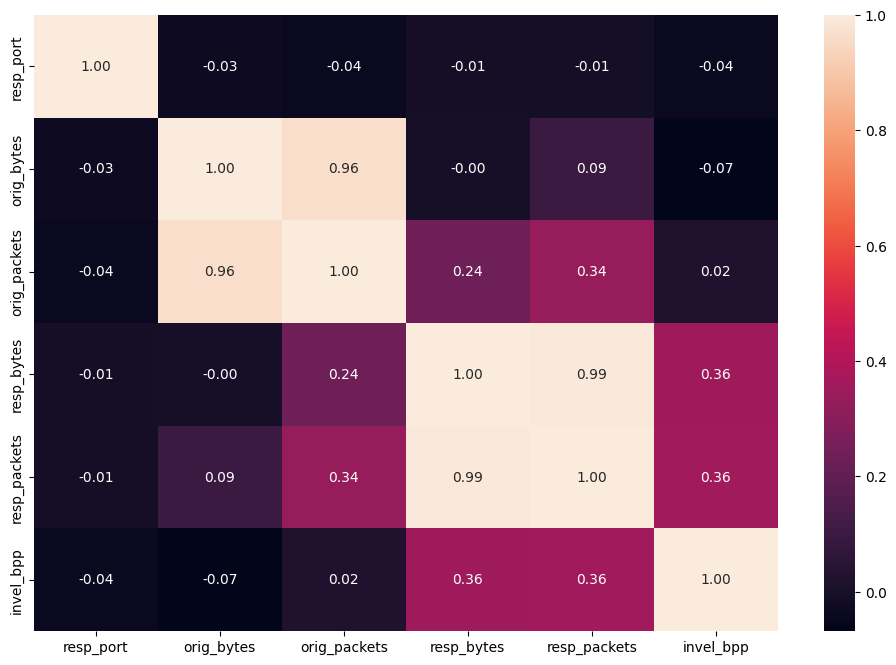

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and clean data
data_cleaned = pd.read_csv('/content/threats_cleaned.csv')

# Ensure 'invel_bpp' is numeric, and handle large values if needed
data_cleaned['invel_bpp'] = pd.to_numeric(data_cleaned['invel_bpp'], errors='coerce')
# Investigate the large values in 'invel_bpp'
print(data_cleaned['invel_bpp'].describe())

# Replace extremely large values in 'invel_bpp' with NaN if they are unrealistic
threshold = 1e18
data_cleaned.loc[data_cleaned['invel_bpp'] > threshold, 'invel_bpp'] = np.nan

# Display descriptive statistics after handling large values
print(data_cleaned['invel_bpp'].describe())

# Filter numeric columns for correlation matrix
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
plt.show()



In [ ]:
# Check if the column 'ip_address' exists in your DataFrame
if 'ip_address' in data_cleaned.columns:
    print("Column 'ip_address' exists.")
else:
    print("Column 'ip_address' does not exist.")




Column 'ip_address' does not exist.


In [ ]:
# Train your model and select the best one
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the best model
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Load the model for future use
loaded_model = joblib.load('best_random_forest_model.pkl')



ValueError: could not convert string to float: 'tcp'